In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum03"

In [4]:
import pandas as pd

df = pd.read_csv(path + '/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# Variabel target (yang ingin diprediksi)
Y = df['cnt']

# Variabel input (faktor yang mempengaruhi)
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

# Cek bentuk (jumlah baris dan kolom)
X.shape, Y.shape


((731, 11), (731,))

In [7]:
from sklearn.model_selection import train_test_split

# Bagi dataset: 80% untuk training, 20% untuk testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Cek jumlah data
len(X_train), len(X_test)


(584, 147)

In [8]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Latih model dengan data training
model.fit(X_train, Y_train)

# Tampilkan koefisien dan intercept
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)



Intercept: 1248.3209284778172
Koefisien: [  524.72253637  2023.99754659   -38.44465798  -391.55076626
    72.93700256   160.80489213  -632.8562835   2097.24783578
  3488.04217936  -865.43941913 -2080.54039519]


In [9]:
# Prediksi data uji
Y_pred = model.predict(X_test)

# Bandingkan hasil nyata dan prediksi
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
comparison.head(10)


,Actual,Predicted
703,6606,6220.416612
33,1550,1571.605763
300,3747,3043.967028
456,6041,4307.202484
633,7538,6765.659072
557,7264,7231.536106
39,1605,774.904147
356,2209,2139.606601
559,7499,7112.745605
514,5743,6458.992169


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Hitung MSE dan R2
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 691035.0082022651
R-squared: 0.8276670090367212


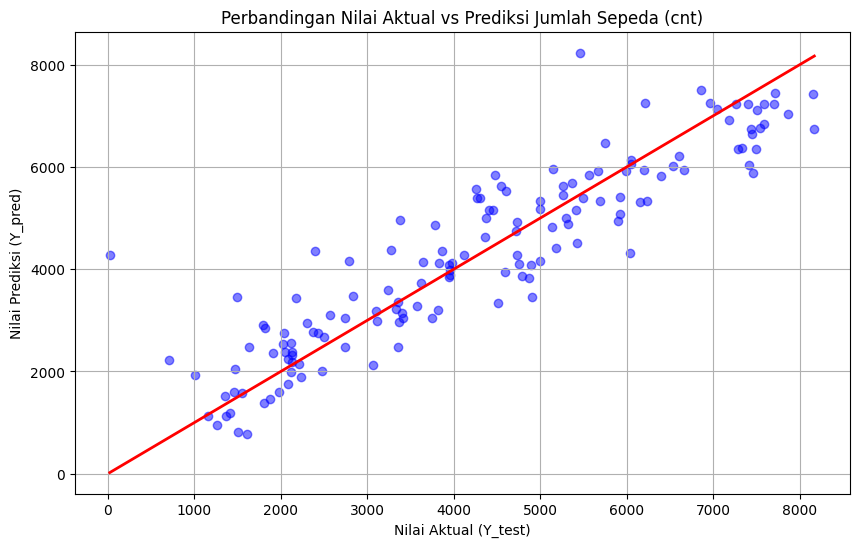

In [11]:
import matplotlib.pyplot as plt

# Buat ukuran figure
plt.figure(figsize=(10,6))

# Plot nilai aktual (asli)
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)

# Garis ideal (prediksi sempurna)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)

# Tambahkan judul dan label
plt.title("Perbandingan Nilai Aktual vs Prediksi Jumlah Sepeda (cnt)")
plt.xlabel("Nilai Aktual (Y_test)")
plt.ylabel("Nilai Prediksi (Y_pred)")
plt.grid(True)
plt.show()



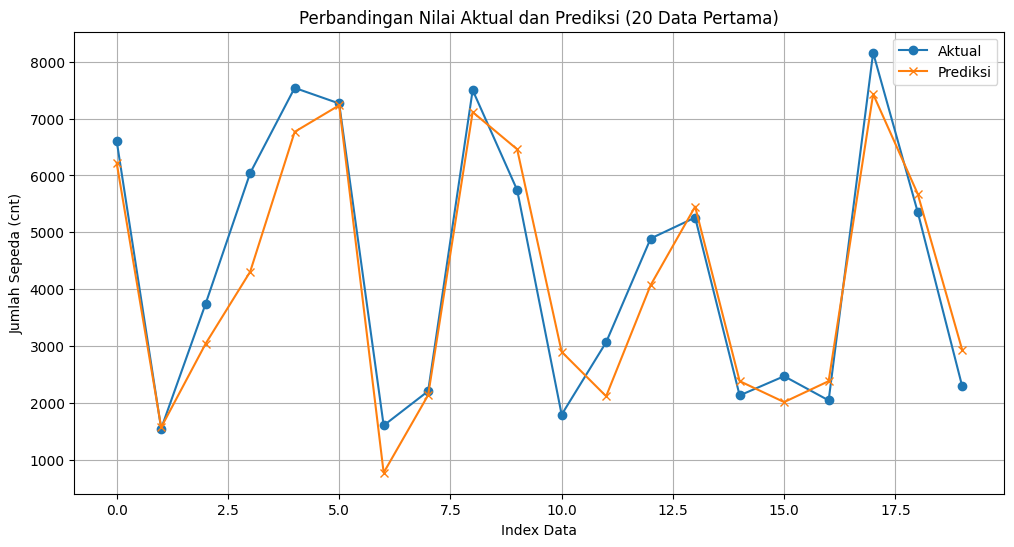

In [12]:
# Tampilkan 20 data pertama
comparison_20 = comparison.head(20).reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(comparison_20['Actual'], label='Aktual', marker='o')
plt.plot(comparison_20['Predicted'], label='Prediksi', marker='x')
plt.title('Perbandingan Nilai Aktual dan Prediksi (20 Data Pertama)')
plt.xlabel('Index Data')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.legend()
plt.grid(True)
plt.show()
